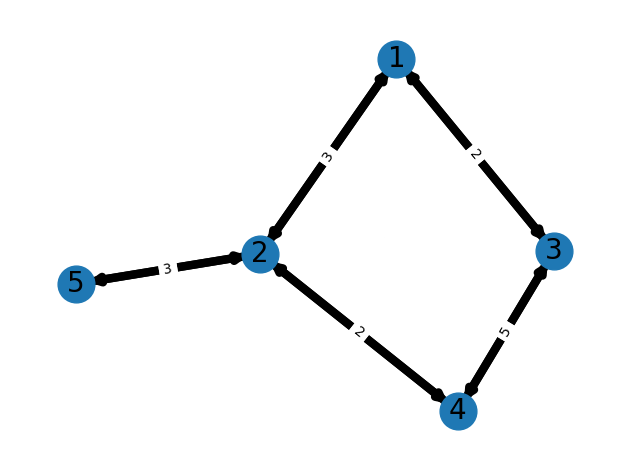

In [11]:
%run ./base.ipynb
import networkx as nx
import matplotlib.pyplot as plt

def print_mst(graph, mst):
    pos = nx.spring_layout(graph, seed=7)  # Positionen der Knoten für die Visualisierung

# Zeichne den gesamten Graphen
    nx.draw(graph, pos,with_labels=True, node_color="lightblue", node_size=500, font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(graph,pos,  edge_labels={(u, v): f"{data['weight']}" for u, v, data in graph.edges(data=True)})

    # Zeichne die MST-Kanten fett und in einer anderen Farbe
    nx.draw_networkx_edges(mst, pos, edge_color="red", width=2.5)

    plt.show()

# Kruskals Algorithm

In [ ]:

def kruskal_mst(graph):
    # Erstellen eines leeren Graphen für den MST
    mst = nx.Graph()
    mst.add_nodes_from(graph.nodes)

    # Kanten des Graphen nach Gewicht sortieren
    sorted_edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])

    # Initialisiere eine Union-Find-Struktur
    uf = {node: node for node in graph.nodes}

    def find(node):
        # Finde das Set, zu dem der Knoten gehört
        if uf[node] != node:
            uf[node] = find(uf[node])  # Path Compression
        return uf[node]

    def union(node1, node2):
        # Vereinigt zwei Sets
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            uf[root2] = root1

    # Durchlaufe die sortierten Kanten und füge sie dem MST hinzu
    for u, v, data in sorted_edges:
        if find(u) != find(v):  # Vermeidung von Zyklen
            mst.add_edge(u, v, weight=data['weight'])
            union(u, v)

            print_mst(G,mst)

    return mst

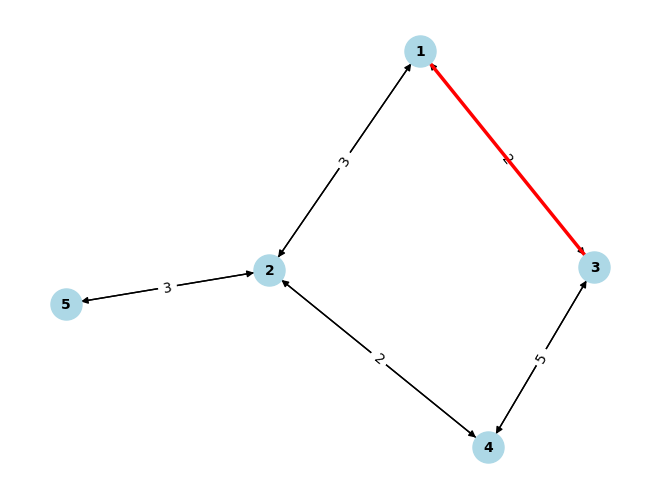

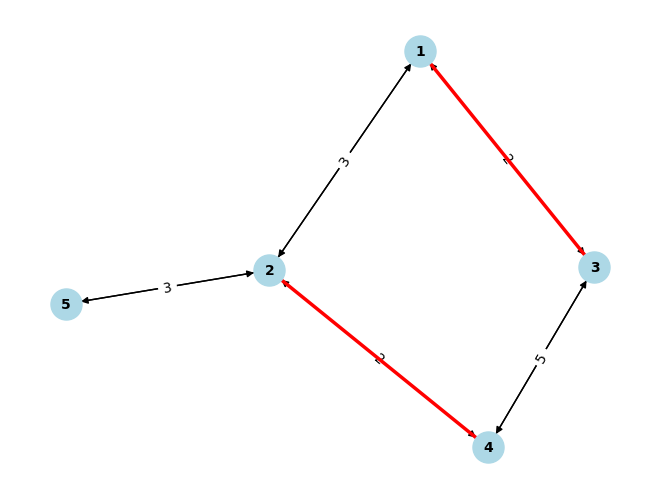

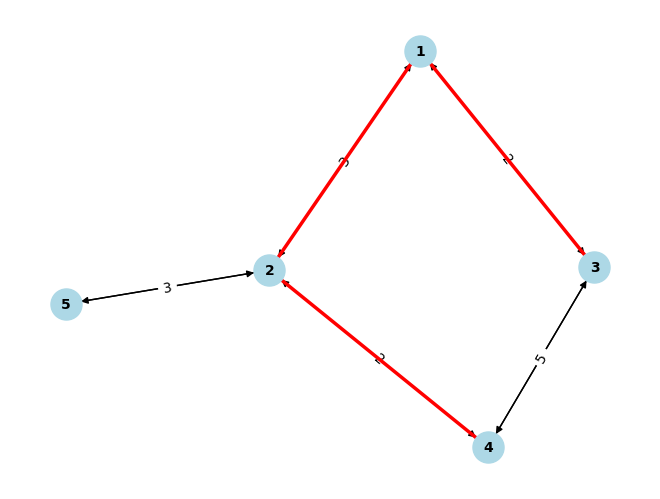

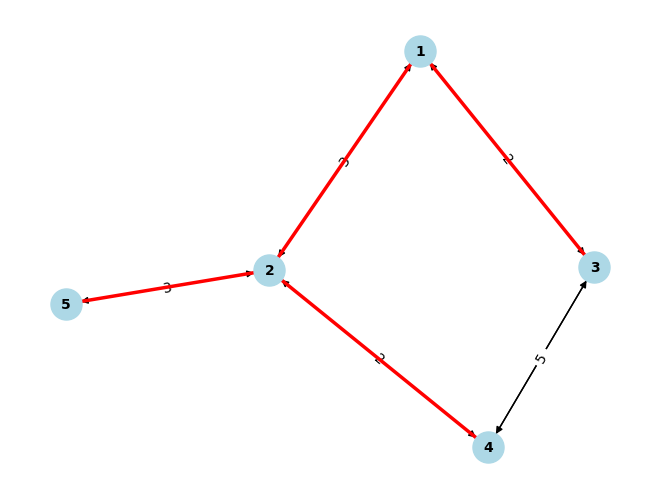

In [14]:
mst = kruskal_mst(G)


# Prim'schen Algorithmus

In [17]:
import heapq

def prim_mst(graph, start_node='1'):
    # Erstellen eines leeren Graphen für den MST
    mst = nx.Graph()
    mst.add_node(start_node)

    # Min-Heap für die Kanten mit (Kosten, Knoten1, Knoten2)
    edges = [(data['weight'], start_node, v) for v, data in graph[start_node].items()]
    heapq.heapify(edges)

    # Knoten-Menge für besuchte Knoten
    visited = set([start_node])

    while edges and len(mst.nodes) < len(graph.nodes):
        # Wähle die Kante mit den geringsten Kosten
        weight, u, v = heapq.heappop(edges)

        if v not in visited:
            # Kante (u, v) dem MST hinzufügen
            mst.add_edge(u, v, weight=weight)
            visited.add(v)

            print_mst(G, mst)

            # Neue Kanten von v in die Warteschlange einfügen
            for neighbor, data in graph[v].items():
                if neighbor not in visited:
                    heapq.heappush(edges, (data['weight'], v, neighbor))

    return mst

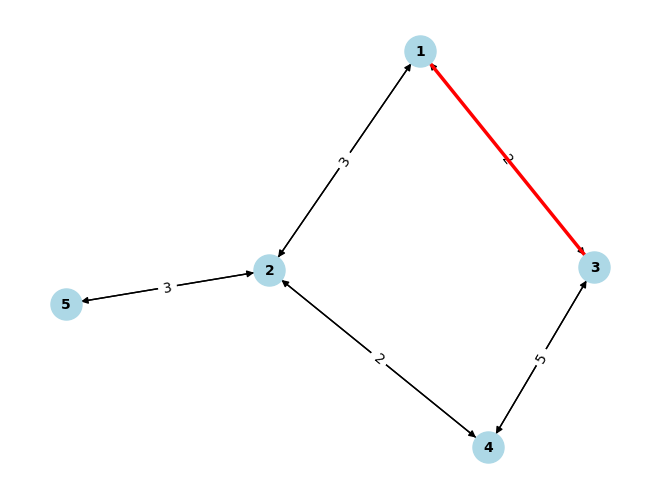

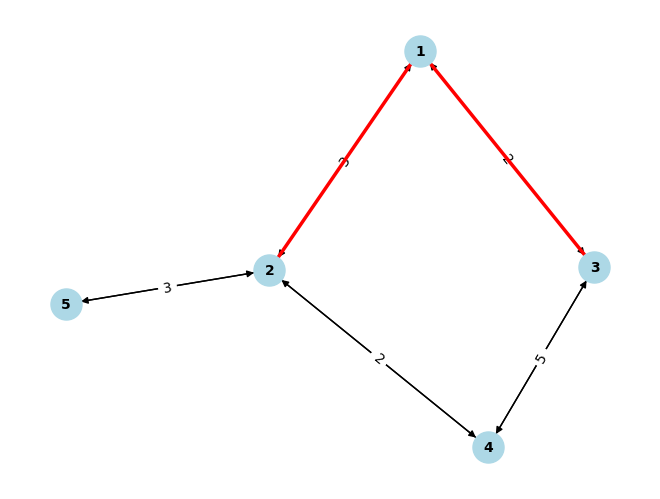

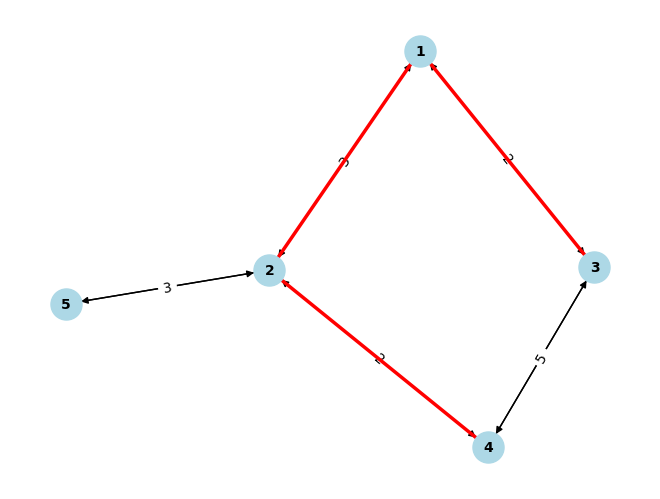

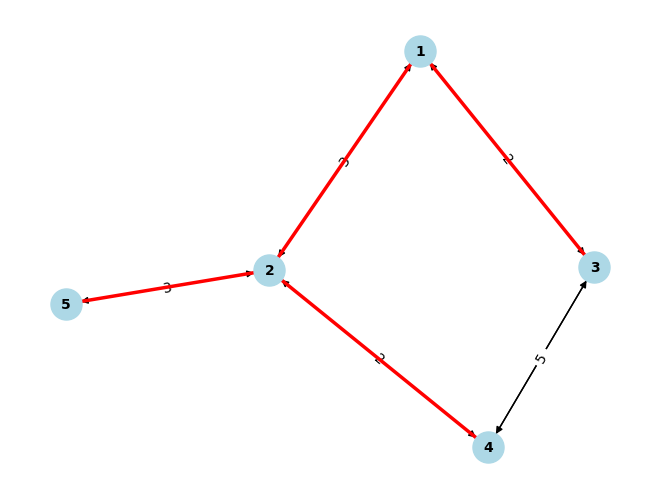

In [16]:
mst_prim = prim_mst(G)
